# Drosix motor identification

## Process

1. Put the drone on the test rig
2. Place a cooking scale below one side
3. Place a plank between the scale and the two arms so that the two arms push equaly on the scale (keep the drone as horizontal as possible)
4. Reset the scale to supress the resting weight from the frame on the scale
5. Activate the two motors on the opposite side of the scale
6. After few second (stable weight) note the measure

## Measures

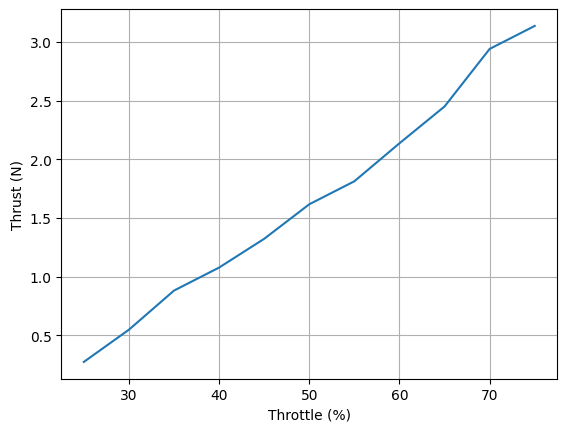

In [1]:
import matplotlib.pyplot as plt
import numpy as np

G = 9.8  # Earth's gravity
weights = {
    25: 28,
    30: 56,
    35: 90,
    40: 110,
    45: 135,
    50: 165,
    55: 185,
    60: 218,
    65: 250,
    70: 300,
    75: 320,
}

throttle = np.fromiter(weights.keys(), dtype=float)
weight = np.fromiter(weights.values(), dtype=float) * 1e-3 * G

plt.plot(throttle, weight)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (N)")
plt.grid()



## Expected result and shape

The drone model gives the following mapping between the throttle $\sigma$ and the thrust $T$:

$$
T = (\omega_b + C_r * \sigma)^2 * C_t
$$

Where $\omega_b$ and $C_r$ are the linear function parameters modeling the ESC behavior and $C_t$ is the propeller thrust coefficient

([], [])

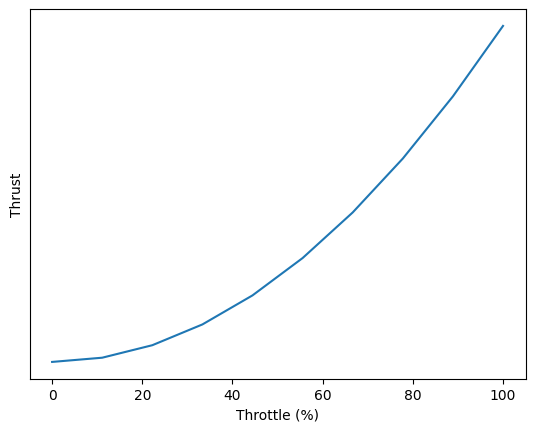

In [2]:
t_shape = np.linspace(0, 100, 10)
w_shape = np.square(50 + 500 * t_shape) * 1e-5

plt.plot(t_shape, w_shape)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust")
plt.yticks([])

## Identification

Model: Wb=33.44723625728836, Cr=658.8945307967093, Ct=1.1639212254532948e-05


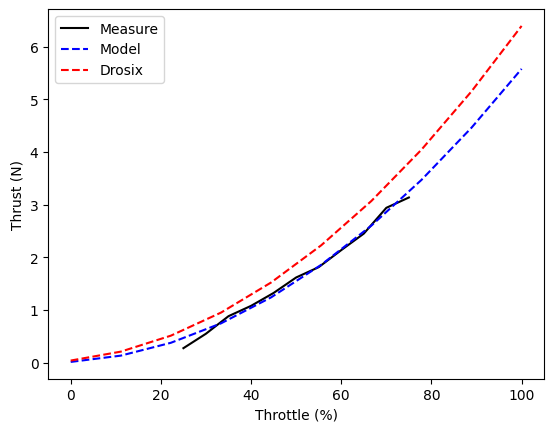

In [3]:
from scipy.optimize import curve_fit


def model(x, wb, cr, ct):
    return np.square(wb + cr * x / 100) * ct

popt, pcov = curve_fit(model, throttle, weight,
                       bounds=([10, 500, 9e-6], [200, 800, 2e-5]))


plt.plot(throttle, weight, 'k', label="Measure")
plt.plot(t_shape, model(t_shape, *popt), '--b', label="Model")
plt.plot(t_shape, model(t_shape, 57, 673, 1.2e-5), '--r', label="Drosix")
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (N)")
plt.legend()
print(f"Model: Wb={popt[0]}, Cr={popt[1]}, Ct={popt[2]}")